<a href="https://colab.research.google.com/github/vicentcamison/idal_ia3/blob/main/2%20Aprendizaje%20profundo%20(I)/Sesion%205/Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

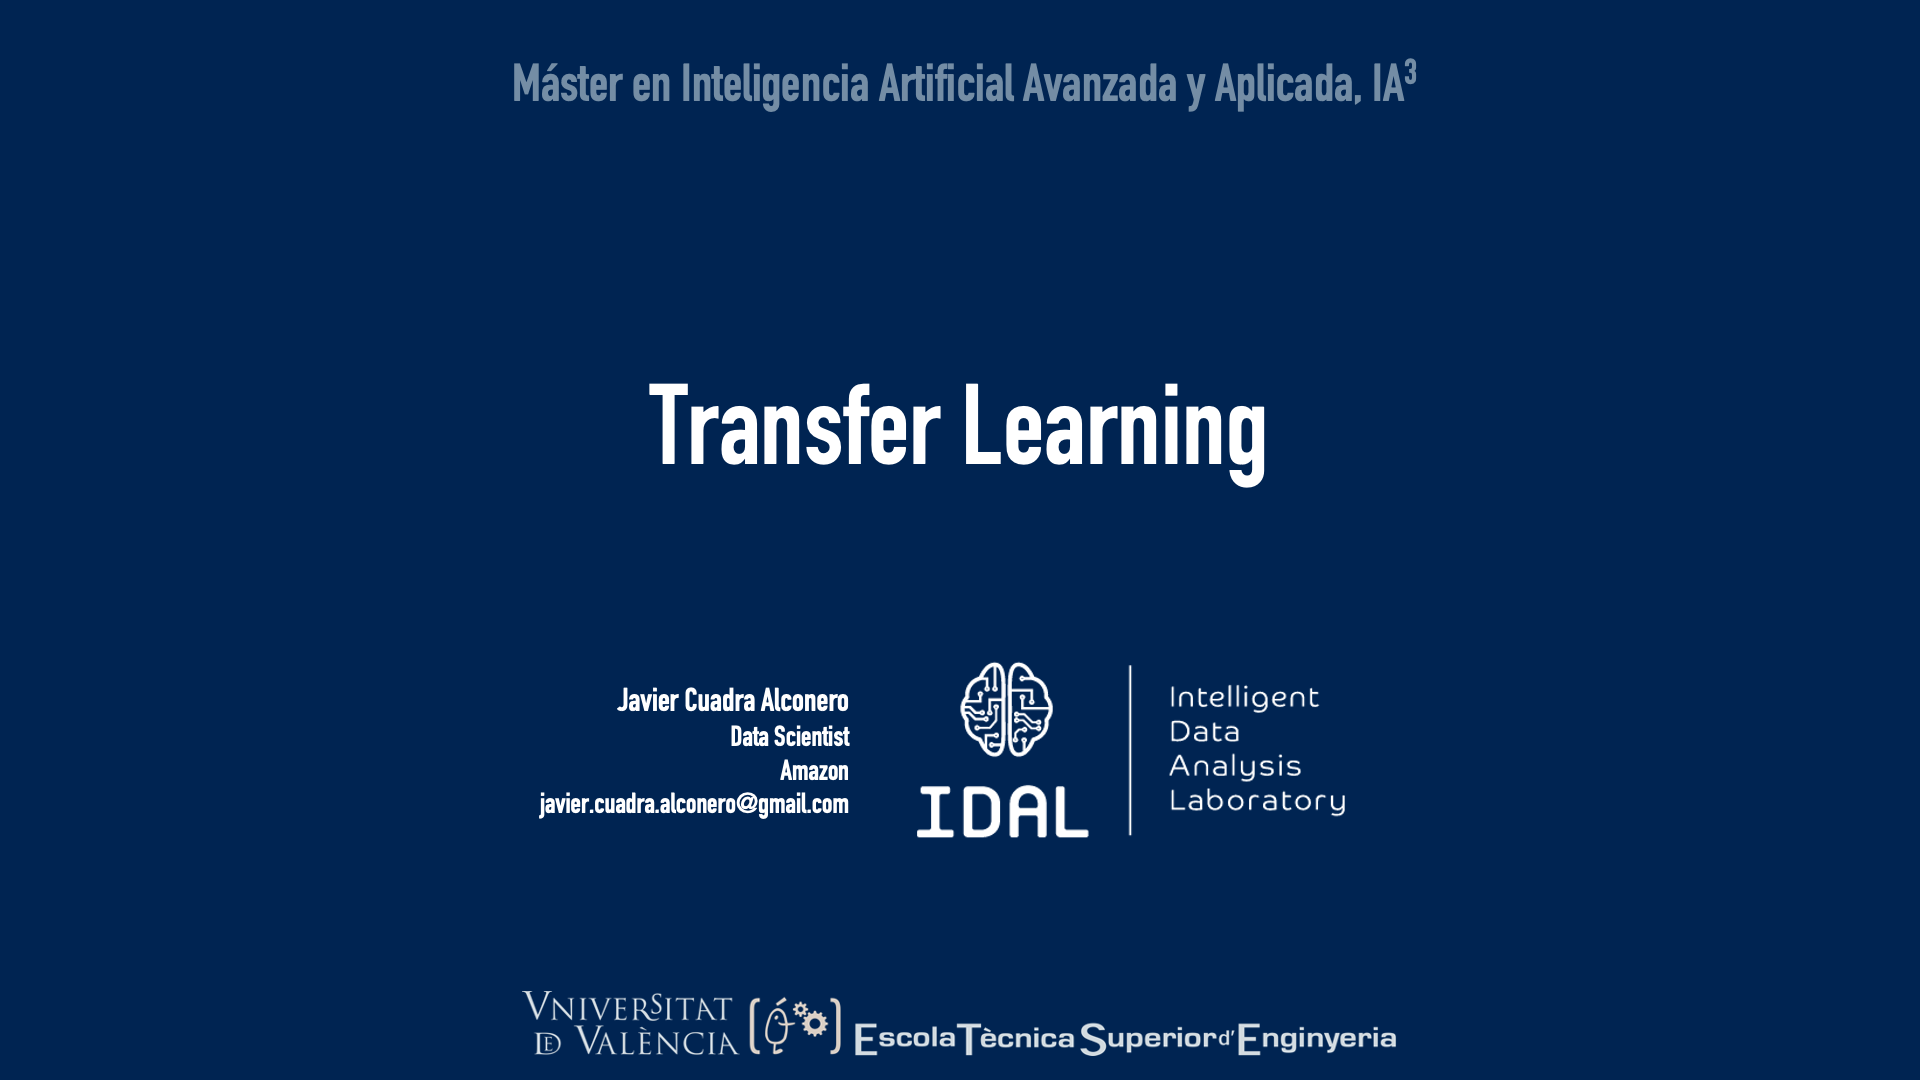

# Introducción a Transfer Learning

Transfer learning hace referencia a un conjunto de técnicas en aprendizaje máquina en las que se utiliza el "conocimiento" obtenido por un modelo para resolver una tarea concreta como punto de partida para un entrenamiento con el objetivo de resolver una tarea similar.

Este tipo de técnicas toma especial importancia en dominios como el procesado del lenguaje natural (NLP) y la visión por computador (Computer Vision) donde los modelos desarrollados son especialmente pesados y han sido entrenados sobre enormes conjuntos de datos.

El mundo del transfer learning es amplio y vasto, se trata de una técnica ampliamente usada en la industria por las ventajas que aporta a la hora de generar un nuevo producto, el cual, sin un modelo preentrenado, tendría unos costes en tiempo y recursos mucho mayores.

En este notebook vamos a aprender dos técnicas diferentes de transfer learning:

- Feature Extraction
- Fine Tuning

# Framework de Transfer Learning

Antes de comenzar a trabajar sobre las técnicas previamente nombradas, pasemos a enumerar los pasos que componen un problema de transfer learning:

- Selección de problema base y problema objetivo: Se selecciona una tarea de aprendizaje como base (problema base) que sea similar a aquella que vamos a resolver (problema objetivo). 

<center>

<br>

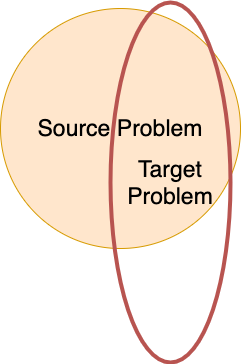

</center>

- Entrenamiento o selección de algoritmo base: Se entrena o selecciona un algoritmo que ha aprendido sobre un amplio conjunto de datos que comprende el problema base.

- Implantación o evaluación del modelo sobre el problema objetivo: Se aplica el algoritmo original al problema objetivo y se evalúa su rendimiento.

- Fine-tuning: Se reentrena el algoritmo en caso de ser necesario o se añaden nuevas capas para resolver el problema objetivo.

<br>

<center>

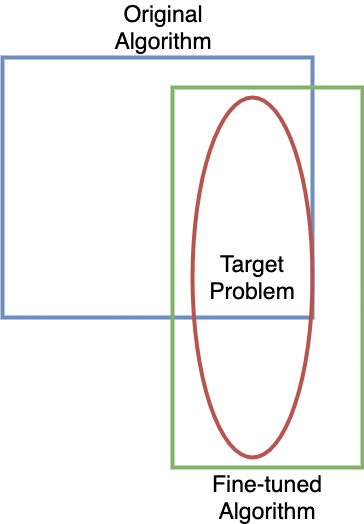

</center>

En la mayoría de escenarios es una idea recomendable partir de un algoritmo base entrenado sobre un conjunto de datos amplio y utilizando recursos que por norma general quedan fuera del alcance del proyecto. Sin embargo, se añade en este framework la opción de construír vosotros mismos un algoritmo, pues es una idea que se debe considerar siempre a la hora de resolver un problema específico para el que no dispongáis de demasiada información. Mirad siempre hacia atrás a otros modelos desarrollados como forma de acelerar vuestros desarrollos o resolver problemas con pequeños datasets.

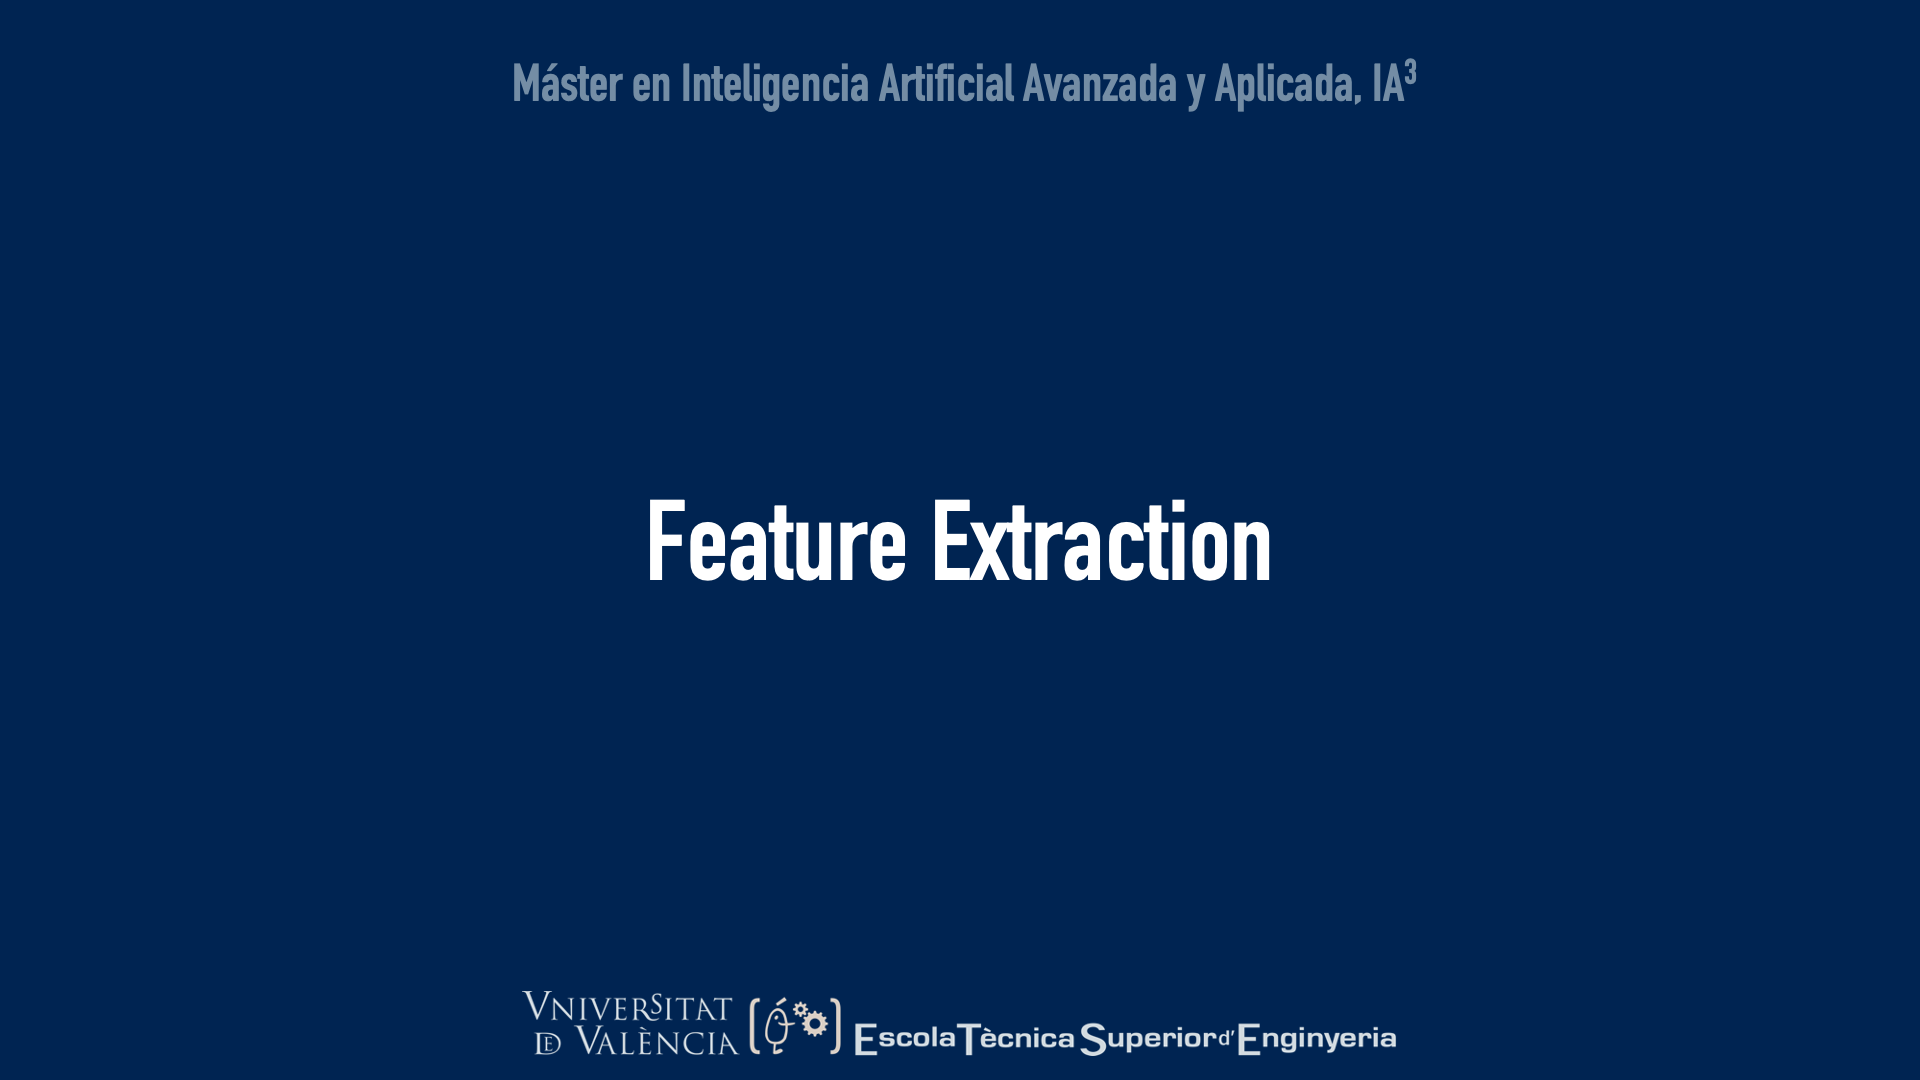

El modelo de feature extraction en transfer learning se basa en utilizar un modelo previamente entrenado para obtener nuevas características que servirán de entrada para entrenar un nuevo modelo.

Visualicemos una red de neuronas y las salidas de cada una de sus capas:

<center>

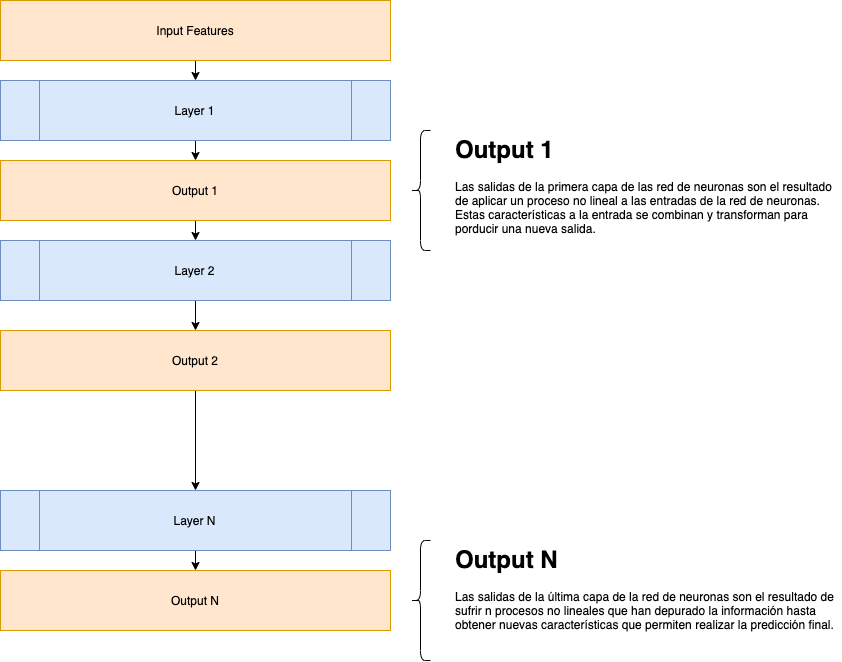

</center>

La idea del proceso de feature extraction es utilizar las salidas producidas en una de las capas de una red de neuronas como entrada para un nuevo modelo. Esta aproximación se basa justamente en las capacidades de una red de neuronas para generar información de mayor calidad tras atravesar sus diferentes capas.

Vamos a realizar algunos ejemplos utilizando la librería Keras para generar recursos con los que construir nuestros modelos utilizando transfer learning.

# Ejemplo 01

Construyamos un modelo de clasificación para el dataset Iris, guardemos el modelo e importémoslo de nuevo.

In [55]:
import seaborn as sns
import tensorflow.keras as keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
iris = sns.load_dataset("iris")
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [3]:
X=iris.iloc[:,:4]
Y=pd.get_dummies(iris.iloc[:,-1])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [4]:
input = keras.Input(X.shape[1],)
layer_1 = keras.layers.Dense(10, activation="relu")(input)
layer_1_drop = keras.layers.Dropout(0.2)(layer_1)
layer_2 = keras.layers.Dense(5, activation="relu")(layer_1_drop)
output = keras.layers.Dense(3, activation="softmax")(layer_2)
model = keras.Model(inputs=input, outputs=output, name="Iris_classifier")
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.CategoricalCrossentropy())

In [5]:
model.summary()

Model: "Iris_classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense (Dense)                (None, 10)                50        
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 18        
Total params: 123
Trainable params: 123
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
4/4 [==============================] - 0s 3ms/step - loss: 1.9372
Epoch 2/10
4/4 [==============================] - 0s 2ms/step - loss: 1.7053
Epoch 3/10
4/4 [==============================] - 0s 2ms/step - loss: 1.5865
Epoch 4/10
4/4 [==============================] - 0s 2ms/step - loss: 1.4877
Epoch 5/10
4/4 [==============================] - 0s 2ms/step - loss: 1.4393
Epoch 6/10
4/4 [==============================] - 0s 2ms/step - loss: 1.4091
Epoch 7/10
4/4 [==============================] - 0s 2ms/step - loss: 1.3150
Epoch 8/10
4/4 [==============================] - 0s 2ms/step - loss: 1.2765
Epoch 9/10
4/4 [==============================] - 0s 2ms/step - loss: 1.2639
Epoch 10/10
4/4 [==============================] - 0s 2ms/step - loss: 1.1290


In [7]:
model.save("iris_1")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: iris_1/assets


In [8]:
loaded_model = keras.models.load_model("iris_1")

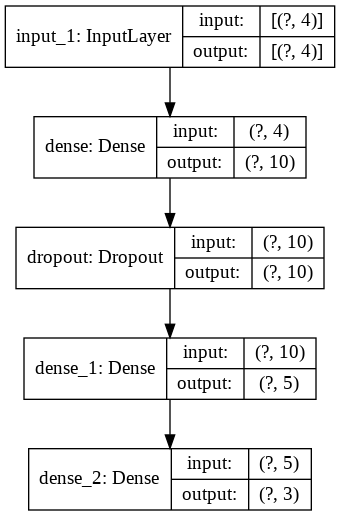

In [9]:
keras.utils.plot_model(loaded_model, show_shapes=True)

In [10]:
loaded_model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 1.1145
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0859
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0794
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0120
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9929
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9626
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9686
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9672
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8761
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9146
Epoch 11/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8687
Epoch 12/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8845
Epoch 13/100
4/4 [==============================] - 0s 3ms/st

# Ejemplo 02

Extraer características de las diferentes capas del modelo previamente entrenado.

In [11]:
from tensorflow.keras import backend as K
import numpy as np

In [13]:
#Cómo acceder a las capas de un modelo:

loaded_model.layers

In [14]:
loaded_model.layers[1]

In [15]:
#Cada una de las capas del modelo tiene muchos atributos con los que jugar

#Por ejemplo, consultemos los pesos de la capa usando el atributo weights
loaded_model.layers[1].weights

[<tf.Variable 'dense/kernel:0' shape=(4, 10) dtype=float32, numpy=
 array([[-0.28849468,  0.00265292, -0.1872236 ,  0.38613653,  0.04597224,
         -0.47250566, -0.15686435,  0.06687766, -0.38323838, -0.63482696],
        [-0.45096827, -0.51676214, -0.4562113 ,  0.5137277 , -0.7476463 ,
          0.11033458, -0.3188282 , -0.37848726,  0.454239  , -0.26778576],
        [ 0.10576212,  0.60667676,  0.39490694, -0.5959324 ,  0.51930684,
          0.31328607, -0.55137825, -0.06792498, -0.61560017,  0.55294776],
        [ 0.19812733,  0.8231905 ,  0.6729014 , -0.40872976,  0.0744625 ,
         -0.500738  ,  0.32168245,  0.31118143,  0.3919307 , -0.03308088]],
       dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(10,) dtype=float32, numpy=
 array([ 0.        , -0.05135952, -0.13739082, -0.0129866 , -0.16608989,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       dtype=float32)>]

Para realizar el siguiente ejercicio vamos a construir modelos basados en las capas intermedias de nuestro modelo anterior.

In [16]:
inp = loaded_model.layers[0]
outputs = [layer for layer in loaded_model.layers]   # all layer outputs
models = [keras.Model(inputs=inp.output, outputs=output.output) for output in outputs[1:]]    # evaluation functions

#Dicho por Javi: lo de arriba se hace así porque el modelo ya está compilado

# Testing
layer_outs = [model.predict(X_test) for model in models]

In [17]:
len(layer_outs)

4

In [18]:
layer_outs[0]
#Como se puede ver en el output de esto, podemos comprobar que hay 10 características en el output
# coincide con el número de neuronas de la primera capa del modelo que hemos definido

array([[0.        , 0.        , 0.        , 3.0044527 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 3.6647024 , 0.9095328 , 0.        , 0.88996303,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 2.8991117 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 2.430779  , 0.20268813, 0.4988525 , 0.39014387,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 2.8732371 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 2.5368667 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 2.9586852 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.       

In [19]:
#Esto es lo que hemos visto arriba, pero ordenado como un DataFrame
df_new_features = pd.DataFrame(layer_outs[0])
df_new_features.head(5)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.000000,0.000000,3.004453,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,3.664702,0.909533,0.000000,0.889963,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.000000,2.899112,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,2.430779,0.202688,0.498852,0.390144,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.000000,2.873237,0.000000,0.0,0.0,0.0,0.0,0.0


# Ejercicio 01

Ahora que somos capaces de extraer las características generadas por una red de neuronas. Realizad el siguiente ejercicio:

- Descargad el dataset de titanic.
- Entrenad una red de neuronas de 2 capas con 5 neuronas por capa (capas de entrada y salida aparte). Durante 20 épocas con un batch size de 64.
- Entrenad un modelo de decision tree classifier utilizando las salidas de la primera capa, segunda capa y las entradas. 
- ¿Cuál de las tres entradas produce mejores resultados?
- Guardad el modelo en vuestra carpeta actual de colab

In [20]:
dataset = sns.load_dataset("titanic")

In [21]:
dataset.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [50]:
#X = dataset.drop(['survived', 'deck'], axis=1)
dataset_clean = dataset.dropna(axis=0, how='any')
X = dataset_clean.drop(['survived', 'deck', 'class'], axis=1)
#X.replace(to_replace='Third', value=3, inplace=True)
#X.replace(to_replace='Second', value=2, inplace=True)
#X.replace(to_replace='First', value=1, inplace=True)
X = pd.get_dummies(X, columns=['sex', 'embarked', 'who', 'embark_town', 'alive'])
X.drop(['sex_female', 'alive_no'], axis=1, inplace=True)
Y = dataset_clean.loc[:, 'survived']
Y = pd.get_dummies(Y)
X

,pclass,age,sibsp,parch,fare,adult_male,alone,sex_male,embarked_C,embarked_Q,embarked_S,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,alive_yes
1,1,38.0,1,0,71.2833,False,False,0,1,0,0,0,0,1,1,0,0,1
3,1,35.0,1,0,53.1000,False,False,0,0,0,1,0,0,1,0,0,1,1
6,1,54.0,0,0,51.8625,True,True,1,0,0,1,0,1,0,0,0,1,0
10,3,4.0,1,1,16.7000,False,False,0,0,0,1,1,0,0,0,0,1,1
11,1,58.0,0,0,26.5500,False,True,0,0,0,1,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,47.0,1,1,52.5542,False,False,0,0,0,1,0,0,1,0,0,1,1
872,1,33.0,0,0,5.0000,True,True,1,0,0,1,0,1,0,0,0,1,0
879,1,56.0,0,1,83.1583,False,False,0,1,0,0,0,0,1,1,0,0,1
887,1,19.0,0,0,30.0000,False,True,0,0,0,1,0,0,1,0,0,1,1


In [77]:
input_layer = keras.layers.Input(shape=(X.shape[1],)) 
dense_01 = keras.layers.Dense(5, activation='relu')(input_layer)
dense_02 = keras.layers.Dense(5, activation='relu')(dense_01)
classifier = keras.layers.Dense(2, activation='softmax')(dense_02) #es mejor esto para poder luego visualizar mejor los heatmaps
model = keras.Model(inputs=input_layer, outputs=classifier, name='Titanic_classifier')

In [78]:
model.summary()

Model: "Titanic_classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 18)]              0         
_________________________________________________________________
dense_19 (Dense)             (None, 5)                 95        
_________________________________________________________________
dense_20 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_21 (Dense)             (None, 2)                 12        
Total params: 137
Trainable params: 137
Non-trainable params: 0
_________________________________________________________________


In [79]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [80]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, shuffle=True, random_state=42)

In [84]:
history = model.fit(x=np.asarray(X_train).astype('float32'), y=Y_train, batch_size=64, epochs=20, validation_data=(np.asarray(X_test).astype('float32'), Y_test))

Epoch 1/20
3/3 [==============================] - 0s 16ms/step - loss: 1.1487 - accuracy: 0.6985 - val_loss: 1.6599 - val_accuracy: 0.6087
Epoch 2/20
3/3 [==============================] - 0s 7ms/step - loss: 1.0917 - accuracy: 0.6985 - val_loss: 1.5705 - val_accuracy: 0.6087
Epoch 3/20
3/3 [==============================] - 0s 7ms/step - loss: 1.0359 - accuracy: 0.6985 - val_loss: 1.4937 - val_accuracy: 0.6087
Epoch 4/20
3/3 [==============================] - 0s 7ms/step - loss: 0.9918 - accuracy: 0.6985 - val_loss: 1.4243 - val_accuracy: 0.6087
Epoch 5/20
3/3 [==============================] - 0s 7ms/step - loss: 0.9519 - accuracy: 0.6985 - val_loss: 1.3583 - val_accuracy: 0.6087
Epoch 6/20
3/3 [==============================] - 0s 7ms/step - loss: 0.9137 - accuracy: 0.6985 - val_loss: 1.2938 - val_accuracy: 0.6087
Epoch 7/20
3/3 [==============================] - 0s 7ms/step - loss: 0.8761 - accuracy: 0.7059 - val_loss: 1.2322 - val_accuracy: 0.6087
Epoch 8/20
3/3 [=================

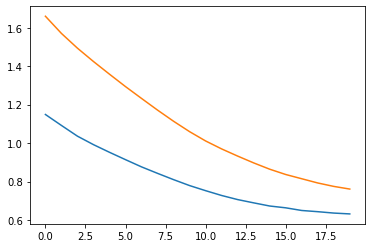

In [85]:
results = pd.DataFrame(history.history)
plt.plot(results.loss)
plt.plot(results.val_loss)

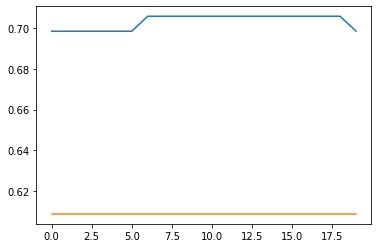

In [86]:
plt.plot(results.accuracy)
plt.plot(results.val_accuracy)

In [87]:
model.save('titanic_classifier')

INFO:tensorflow:Assets written to: titanic_classifier/assets


Extraer diferentes características del modelo previamente entrenado

In [90]:
#Hacemos el decision tree

inp = model.layers[0]
outputs = [layer for layer in model.layers[1:-1]]
models = [keras.Model(inputs=inp.output, outputs=output.output) for output in outputs]
features = [model.predict(np.asarray(X_train).astype('float32')) for model in models]

In [91]:
features_01 = pd.DataFrame(features[0])
features_02 = pd.DataFrame(features[1])

In [93]:
features_01.head(5)

,0,1,2,3,4
0,0.0,28.735340,32.964638,2.740635,0.0
1,0.0,24.261724,28.437304,4.944489,0.0
2,0.0,15.509141,17.737099,7.182903,0.0
3,0.0,15.255792,18.199070,4.316524,0.0
4,0.0,15.690548,18.924440,4.091777,0.0


In [94]:
from sklearn.tree import DecisionTreeClassifier

tree_classifier_input = DecisionTreeClassifier(max_depth=5)
tree_classifier_input.fit(np.asarray(X_train).astype('float32'), Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(167.4, 163.07999999999998, 'X[17] <= 0.5\ngini = 0.421\nsamples = 136\nvalue = [[95, 41]\n[41, 95]]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 41\nvalue = [[0, 41]\n[41, 0]]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 95\nvalue = [[95, 0]\n[0, 95]]')]

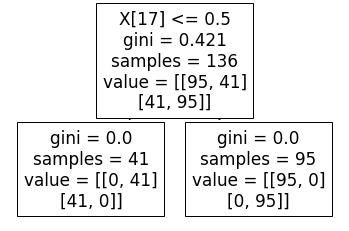

In [103]:
from sklearn.tree import plot_tree

plot_tree(tree_classifier_input)

In [98]:
tree_classifier_input.score(np.asarray(X_train).astype('float32'), Y_train)

1.0

In [99]:
tree_classifier_input.score(np.asarray(X_test).astype('float32'), Y_test)

1.0

In [100]:
tree_classifier_dense01 = DecisionTreeClassifier(max_depth=5)
tree_classifier_dense01.fit(np.asarray(features_01).astype('float32'), Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [101]:
tree_classifier_dense01.score(features_01, Y_train)

0.8235294117647058

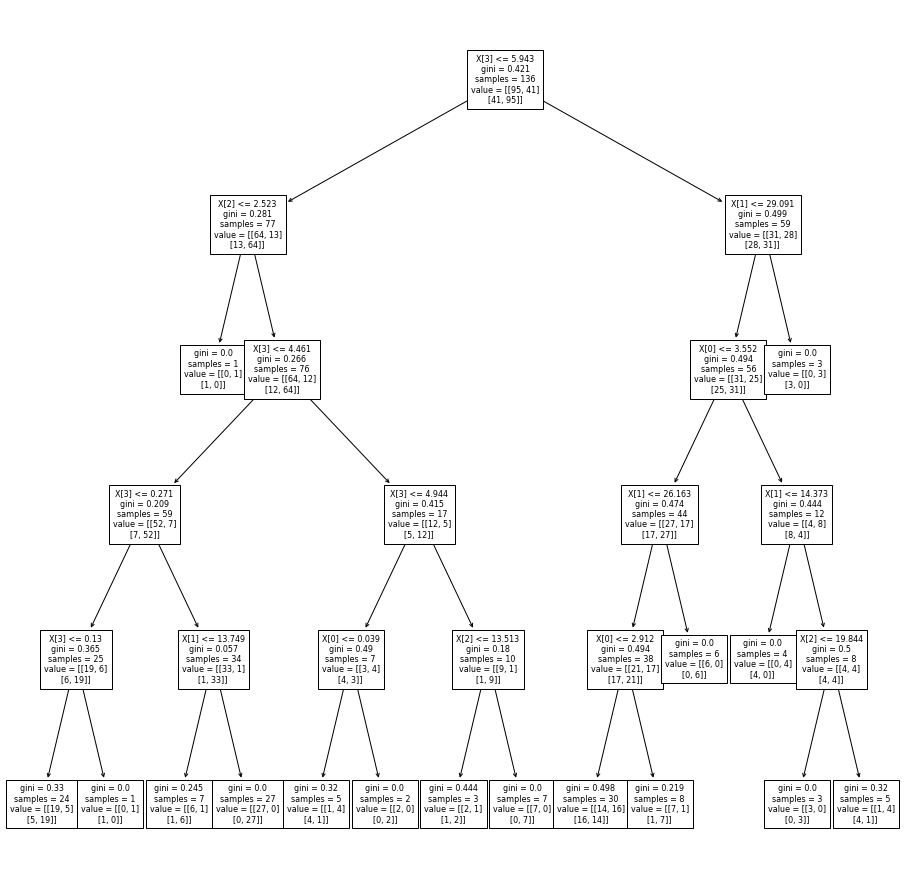

In [109]:
fig, ax = plt.subplots(figsize=(16, 16))
plot_tree(tree_classifier_dense01, fontsize=8)
plt.show()

# Conclusiones:

La aproximación de feature extraction utiliza un modelo previo como un extractor de características. Las diferentes capas de una red de neuronas combinan las entradas para generar diferentes salidas en cada iteración. El entrenamiento de la red permite generar estas características utilizando como guía una función de pérdida. Estas características en algunas ocasiones, pueden servir como mejores entradas para generar un nuevo algoritmo que la información en bruto del dataset original.

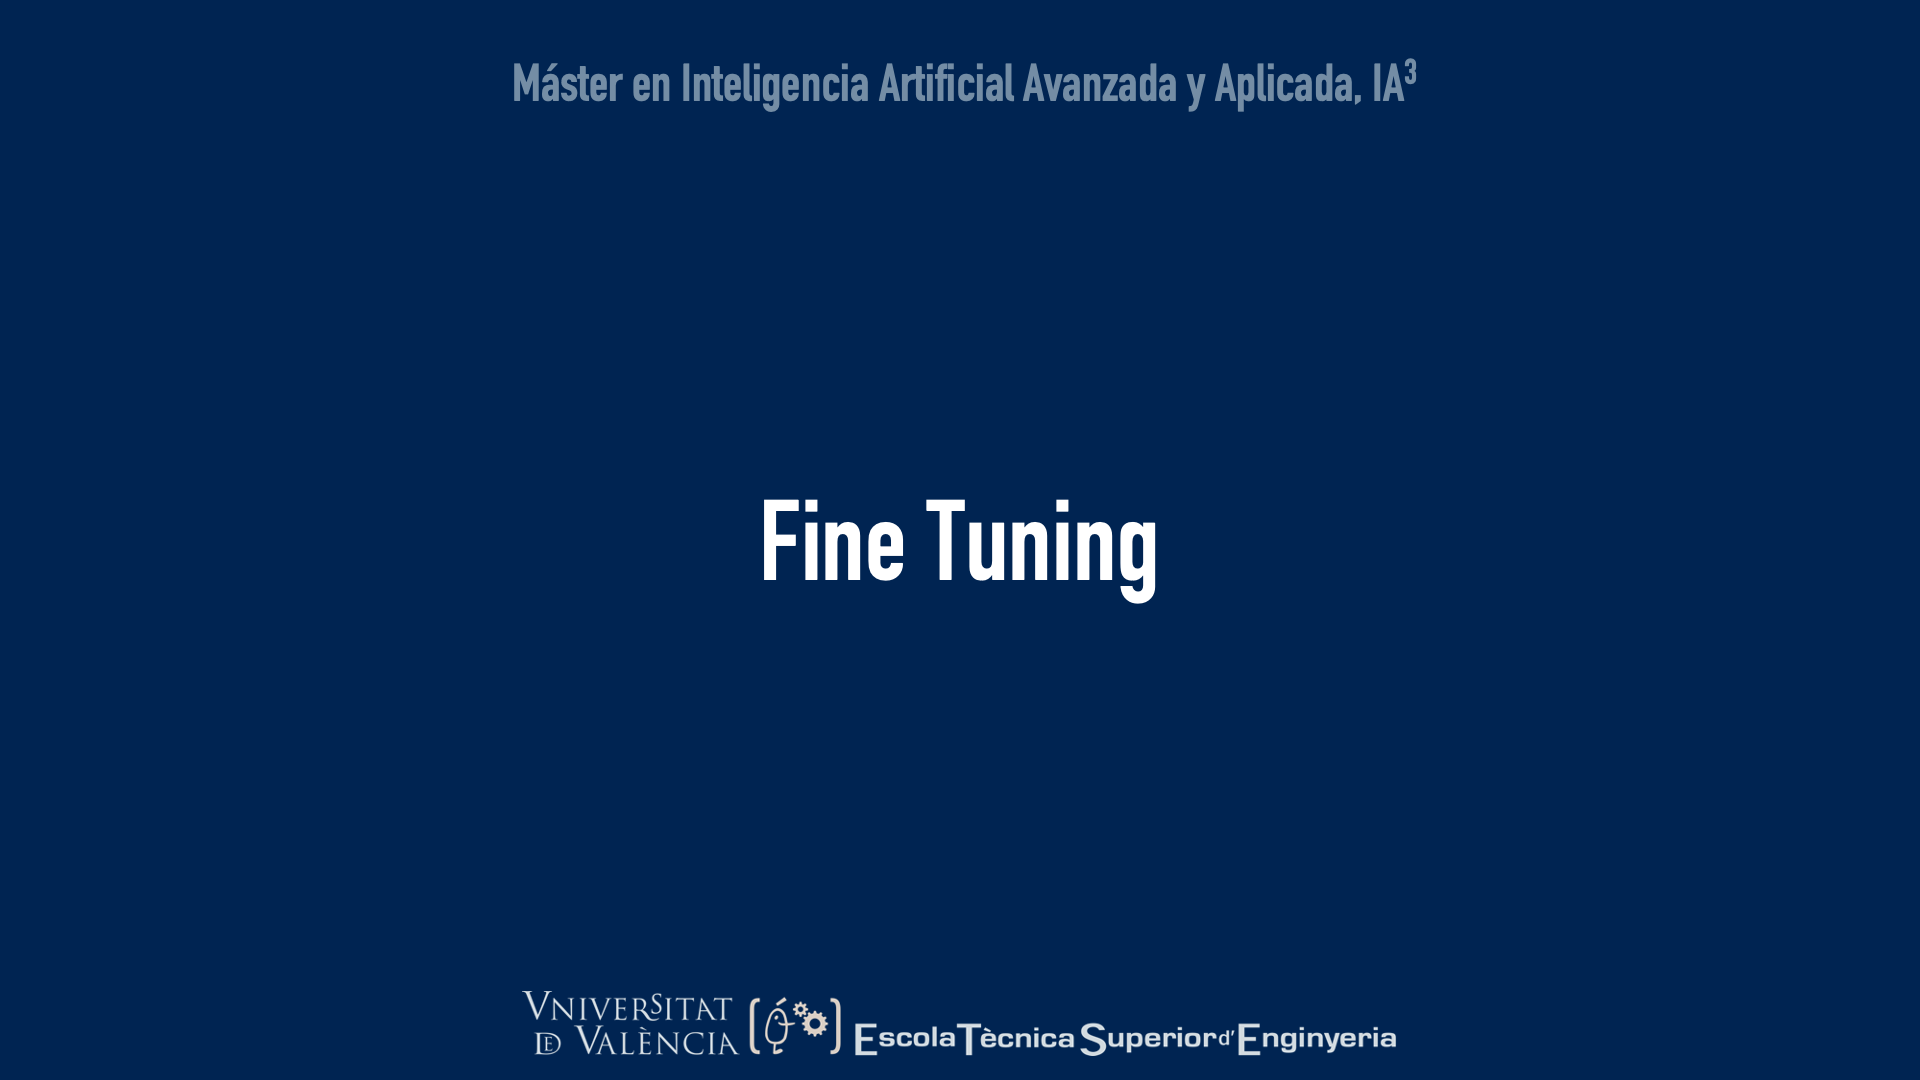

La aproximación de Fine Tuning plantea realizar un reentrenamiento sobre algunas de las capas del modelo construyendo una nueva capa de salida.

<br>

<center>

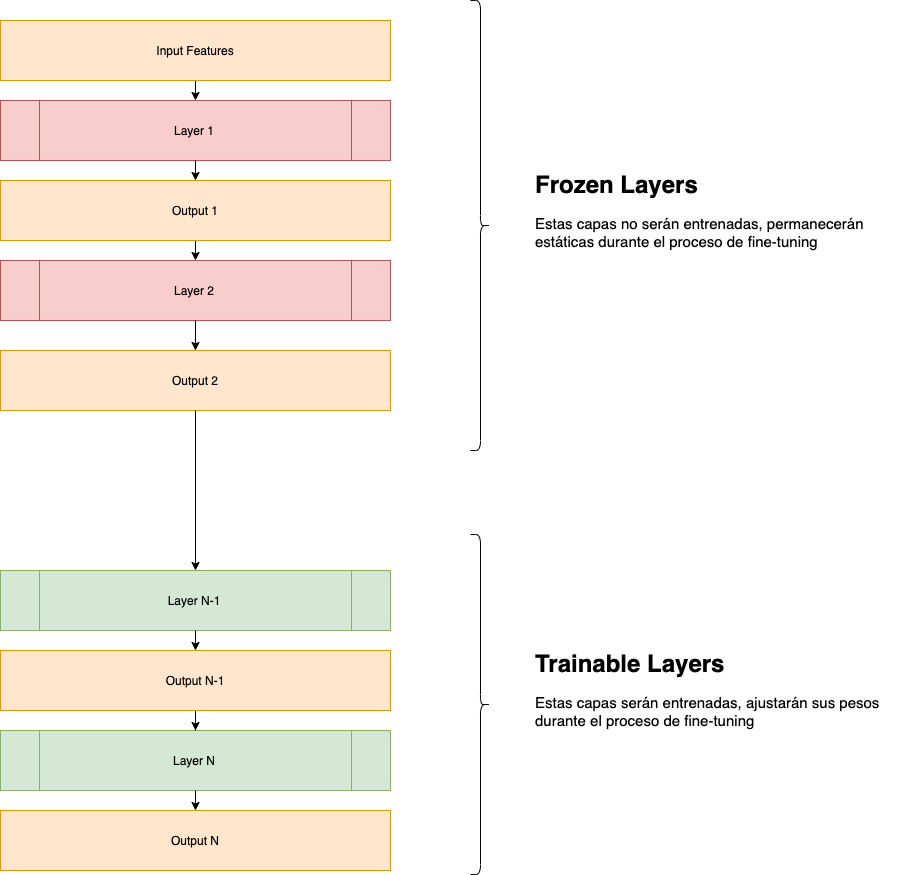

</center>

<br>

La idea principal tras esta aproximación se sustenta en que los modelos de aprendizaje profundo aprenden de forma general en las primeras capas del modelo y se especializan en sus últimas capas conforme se aproximan a la salida.



# Ejemplo 03

Carguemos el modelo de Iris previamente entrenado y congelemos algunas capas.

In [110]:
loaded_model = keras.models.load_model("iris_1")
loaded_model.summary()

Model: "Iris_classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense (Dense)                (None, 10)                50        
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 18        
Total params: 123
Trainable params: 123
Non-trainable params: 0
_________________________________________________________________


In [111]:
layers = loaded_model.layers
for layer in layers:
  print(layer.name, layer.trainable)

input_1 True
dense True
dropout True
dense_1 True
dense_2 True


Como se ve todas nuestras capas son entrenables en principio, en capas como las de input o dropout el parámetro es irrelevante dado que no existen pesos que congelar.

In [ ]:
loaded_model.layers[1].trainable = False
loaded_model.layers[3].trainable = False
loaded_model.summary()

Model: "Iris_classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense (Dense)                (None, 10)                50        
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 18        
Total params: 123
Trainable params: 18
Non-trainable params: 105
_________________________________________________________________


Al establecer el parámetro trainable como False, los parámetros de esas capas no se entrenarán.

# Ejercicio 01_02

Cargad el modelo del dataset de titanic anterior. Realizad un ejercicio de fine tuning para mejorar las salidas de vuestras capaz y volved a evaluar las salidas.


In [124]:
#En este caso, al haber muy pocas capas y muy pococs parámetros, lo reentrenamos todo
loaded_model = keras.models.load_model("titanic_classifier")

In [125]:
layers = loaded_model.layers
for layer in layers:
  print(layer.name, layer.trainable)

input_7 True
dense_19 True
dense_20 True
dense_21 True


In [126]:
loaded_model_history = loaded_model.fit(x=np.asarray(X_train).astype('float32'), y=Y_train, batch_size=64, epochs=500, validation_data=(np.asarray(X_test).astype('float32'), Y_test))

Epoch 1/500
3/3 [==============================] - 0s 41ms/step - loss: 0.6304 - accuracy: 0.7059 - val_loss: 0.7552 - val_accuracy: 0.6087
Epoch 2/500
3/3 [==============================] - 0s 6ms/step - loss: 0.6249 - accuracy: 0.6985 - val_loss: 0.7443 - val_accuracy: 0.6087
Epoch 3/500
3/3 [==============================] - 0s 6ms/step - loss: 0.6219 - accuracy: 0.7059 - val_loss: 0.7410 - val_accuracy: 0.6304
Epoch 4/500
3/3 [==============================] - 0s 6ms/step - loss: 0.6186 - accuracy: 0.7059 - val_loss: 0.7288 - val_accuracy: 0.6304
Epoch 5/500
3/3 [==============================] - 0s 6ms/step - loss: 0.6164 - accuracy: 0.6985 - val_loss: 0.7165 - val_accuracy: 0.6304
Epoch 6/500
3/3 [==============================] - 0s 6ms/step - loss: 0.6149 - accuracy: 0.6912 - val_loss: 0.7081 - val_accuracy: 0.6304
Epoch 7/500
3/3 [==============================] - 0s 6ms/step - loss: 0.6141 - accuracy: 0.6765 - val_loss: 0.7027 - val_accuracy: 0.6304
Epoch 8/500
3/3 [=========

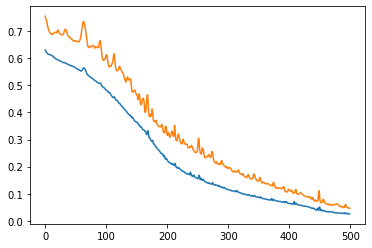

In [127]:
results = pd.DataFrame(loaded_model_history.history)
plt.plot(results.loss)
plt.plot(results.val_loss)

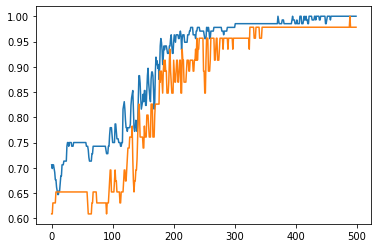

In [128]:
plt.plot(results.accuracy)
plt.plot(results.val_accuracy)

In [129]:
#Hacemos el decision tree

inp = loaded_model.layers[0]
outputs = [layer for layer in loaded_model.layers[1:-1]]
models = [keras.Model(inputs=inp.output, outputs=output.output) for output in outputs]
features = [model.predict(np.asarray(X_train).astype('float32')) for model in models]

In [130]:
features_01 = pd.DataFrame(features[0])
features_02 = pd.DataFrame(features[1])

In [132]:
tree_classifier_dense01 = DecisionTreeClassifier(max_depth=5)
tree_classifier_dense01.fit(np.asarray(features_01).astype('float32'), Y_train)
tree_classifier_dense01.score(features_01, Y_train)

0.9852941176470589

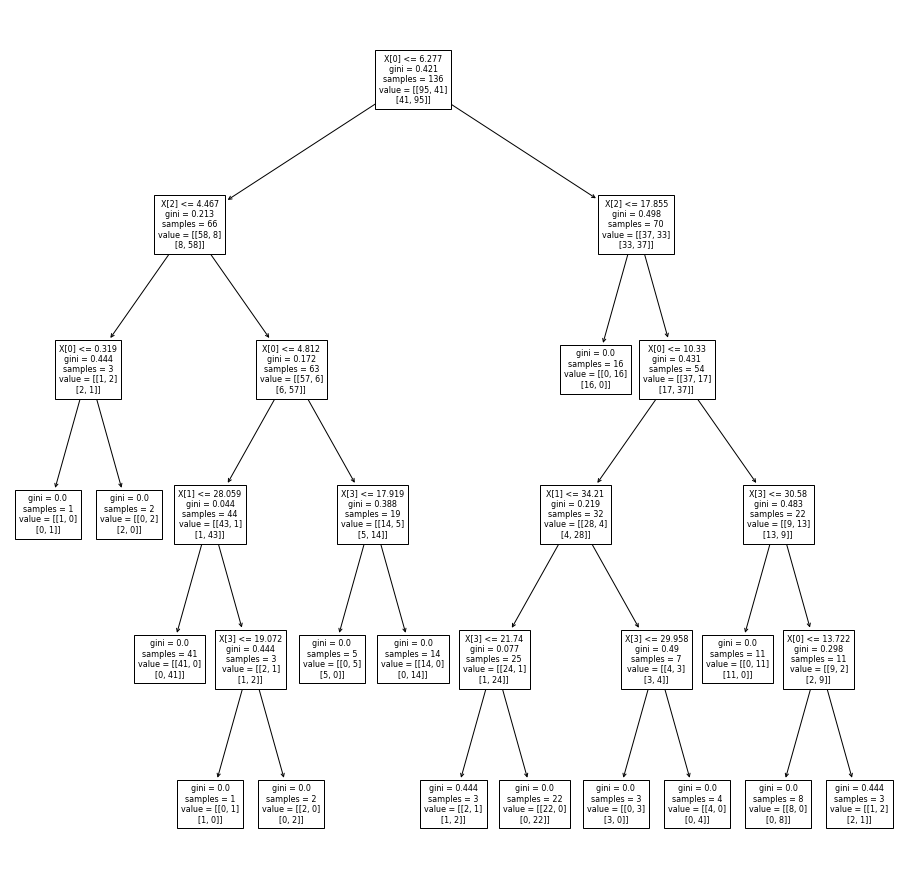

In [133]:
fig, ax = plt.subplots(figsize=(16, 16))
plot_tree(tree_classifier_dense01, fontsize=8)
plt.show()

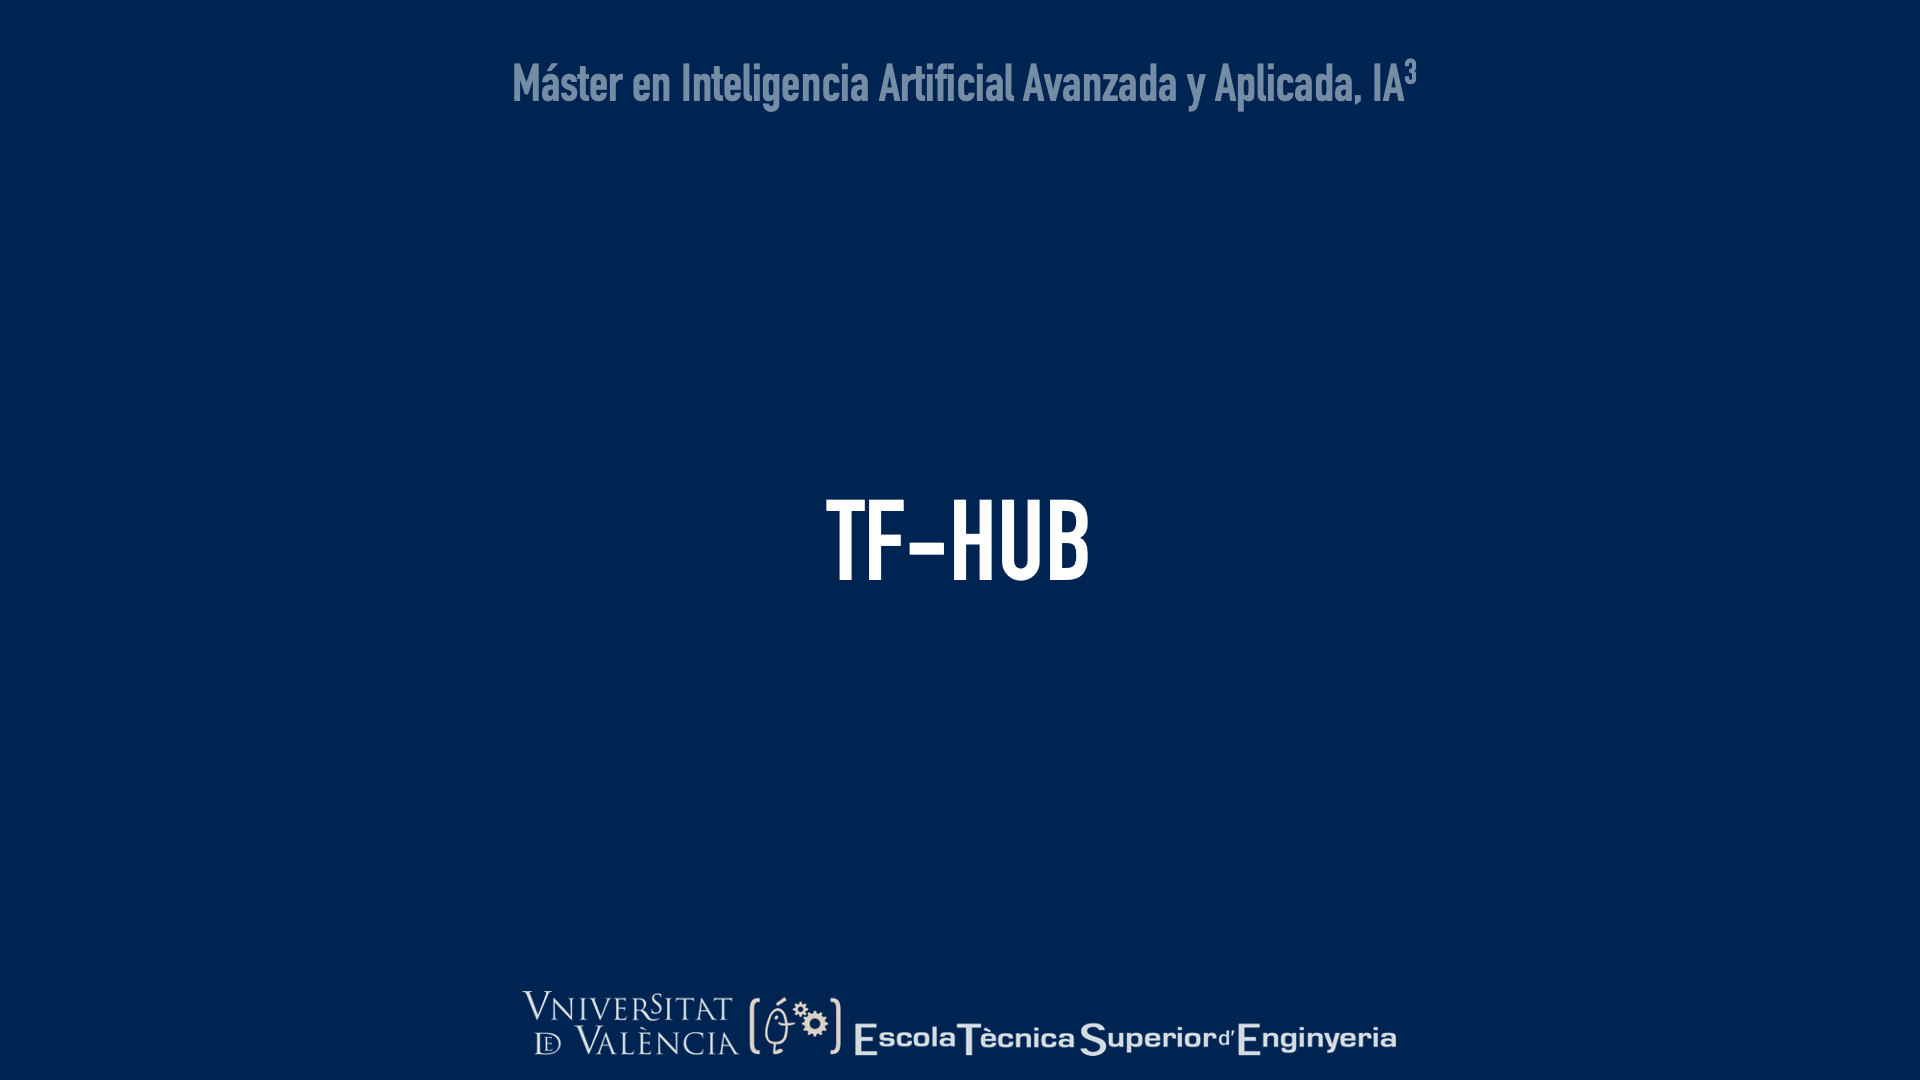

Tensorflow Hub es una librería que permite acceder de forma sencilla a modelos preentrenados con el objetivo de realizar ejercicios de transfer learning. 

In [134]:
import tensorflow_hub as hub

Utilizando este módulo es sencillo importar un modelo preentrenado como una capa de Keras. Es posible importar las capas como trainable o frozen utilizando el parámetro "trainable"

In [136]:
layer = hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v1_100_224/feature_vector/4", trainable=False)

In [137]:
layer

In [138]:
layer.weights

[<tf.Variable 'MobilenetV1/Conv2d_9_depthwise/BatchNorm/beta:0' shape=(512,) dtype=float32, numpy=
 array([ 1.14559448e+00,  7.19707757e-02,  1.05970705e+00, -2.61494696e-01,
         1.99474156e-01,  5.45239389e-01, -3.94931972e-01,  2.78430372e-01,
        -7.01052547e-01, -6.22794926e-02, -7.11375773e-01, -2.57375956e-01,
         2.12318674e-01,  1.08478159e-01, -7.01160192e-01, -1.62617624e-01,
        -4.93074395e-02, -1.24881923e+00, -2.49495178e-01,  1.32113361e+00,
         4.31837648e-01, -4.72823888e-01,  1.93670139e-01, -3.43066752e-01,
        -1.39230683e-01,  4.61109579e-01,  5.41884825e-02, -2.19065875e-01,
         3.72446477e-02,  2.80904591e-01, -6.55099988e-01,  1.11770427e+00,
         6.01350605e-01,  9.67761278e-01,  5.68435490e-01, -1.23019838e+00,
         1.15237248e+00,  1.12901032e+00,  2.60119379e-01,  3.15078139e-01,
         7.63280749e-01, -3.33654821e-01,  2.98974514e-01, -2.84697384e-01,
        -7.95380890e-01,  6.63888633e-01,  1.48780765e-02,  2.142

In [139]:
layer.trainable

False

In [140]:
input = keras.layers.Input(shape=(128,128,3))
mobile_net = layer(input)
model = keras.Model(inputs=input, outputs=mobile_net)
model.compile() #le hemos puesto trainable=false, así que no lo vamos a entrenar, simplemente lo vamos a compilar

In [141]:
model.summary()

Model: "functional_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
keras_layer_1 (KerasLayer)   (None, 1024)              3228864   
Total params: 3,228,864
Trainable params: 0
Non-trainable params: 3,228,864
_________________________________________________________________


A continuación vamos a realizar diversos ejercicios utilizando el módulo tensorflow hub y una gpu, para ello vamos a activar nuestra gpu en el entorno que estamos utilizando.

Para ello seleccionar runtime y la pestaña "Change runtime type". Una vez dentro del menú cambiad de none a GPU.

Para utilizar la gpu es necesario utilizar el comando tf.device() y seleccionar la gpu dentro del mismo. Podemos visualizar los dispositivos disponibles para el entrenamiento utilizando la siguiente sentencia.

In [142]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 9829964579913044837, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 15088922118650889253
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 15544827504452185197
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14640891840
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 10474604933451099088
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

Dentro de los mismos dispositivos podemos seleccionar el que deseemos para entrenar, en nuestro caso utilizaremos: "/device:GPU:0"

# Ejemplo 04

Probad a entrenad durante 500 épocas el dataset de iris con gpu y cpu medid el tiempo añadiendo el magic %%time al comienzo de la celda.

¿Observáis algo extraño?

In [147]:
%%time
with tf.device('/device:GPU:0'):
  loaded_model.fit(x=np.asarray(X_train).astype('float32'), y=Y_train, epochs=500, batch_size=64)

Epoch 1/500
3/3 [==============================] - 0s 3ms/step - loss: 6.3293e-04 - accuracy: 1.0000
Epoch 2/500
3/3 [==============================] - 0s 2ms/step - loss: 6.3254e-04 - accuracy: 1.0000
Epoch 3/500
3/3 [==============================] - 0s 3ms/step - loss: 6.3184e-04 - accuracy: 1.0000
Epoch 4/500
3/3 [==============================] - 0s 3ms/step - loss: 6.3275e-04 - accuracy: 1.0000
Epoch 5/500
3/3 [==============================] - 0s 3ms/step - loss: 6.3279e-04 - accuracy: 1.0000
Epoch 6/500
3/3 [==============================] - 0s 3ms/step - loss: 6.3104e-04 - accuracy: 1.0000
Epoch 7/500
3/3 [==============================] - 0s 2ms/step - loss: 6.2158e-04 - accuracy: 1.0000
Epoch 8/500
3/3 [==============================] - 0s 5ms/step - loss: 6.1462e-04 - accuracy: 1.0000
Epoch 9/500
3/3 [==============================] - 0s 2ms/step - loss: 6.1855e-04 - accuracy: 1.0000
Epoch 10/500
3/3 [==============================] - 0s 2ms/step - loss: 6.2509e-04 - accura

# Ejercicio 02

Realiza un entrenamiento de clasificación sobre el dataset mnist utilizando la gpu y la cpu de 500 épocas utilizando un batch_size de 32, 64 y 256 muestras.

Compara los tiempos de ejecución de ambos entrenamientos.


In [152]:
dataset = pd.read_csv("sample_data/mnist_train_small.csv")

In [174]:
X_mnist = dataset.iloc[:,1:]
Y_mnist = dataset.iloc[:,0]
X_mnist_np = np.array(X_mnist).reshape((X_mnist.shape[0], 28, 28))

In [175]:
cnn_model = keras.models.Sequential()
cnn_model.add(keras.layers.Conv2D(filters=16, kernel_size=3))
cnn_model.add(keras.layers.MaxPooling2D())
cnn_model.add(keras.layers.Conv2D(filters=32, kernel_size=5))
cnn_model.add(keras.layers.MaxPooling2D())
cnn_model.add(keras.layers.Flatten())
cnn_model.add(keras.layers.Dense(32, activation='relu'))
cnn_model.add(keras.layers.Dense(1, activation='sigmoid'))

cnn_model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [176]:
cnn_model.summary()

ValueError: ignored

In [177]:
%%time
with tf.device('/device:GPU:0'):
  cnn_history = cnn_model.fit(X_mnist, Y_mnist, batch_size=64, epochs=64)

Epoch 1/64


ValueError: ignored

# Ejercicio 03

Utilizando una capa de feature extraction de TF-HUB construid un modelo de clasificación para el dataset de cats and dogs propuesto. Consultad los modelos disponibles en https://tfhub.dev/google/collections/image/1

Dado que vamos a cargar un dataset pesado compuesto por muchas imágenes es importante que utilicemos el sistema de preprocesamiento de imágenes de Keras https://keras.io/api/preprocessing/image/

Por lo tanto resolvamos el ejercicio en diferentes pasos construyendo un pipeline:

- Construyamos el dataset generator
- Importemos el modelo de feature extraction de TF-HUB
- Generemos las features para los sets de training y validación (en este ejemplo no realizaremos fine-tuning).
- Entrenemos un modelo de ML tradicional utilizando las features generadas
- Validemos el modelo sobre las features del set de validación.

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /content/cats_and_dogs_filtered.zip

--2020-12-11 10:47:55--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.28.128, 74.125.199.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/content/cats_and_dogs_filtered.zip’

/content/cats_and_d 100%[===================>]  65.43M   126MB/s    in 0.5s    

2020-12-11 10:47:56 (126 MB/s) - ‘/content/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import os
import zipfile

local_zip = '/content/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
# Image Data Generator
generator = keras.preprocessing.image_dataset_from_directory("./cats_and_dogs_filtered/train", image_size=(128,128),
                                                             color_mode='rgb')

Found 2000 files belonging to 2 classes.


In [ ]:
# Load Model For TF Hub
keras_layer = hub.KerasLayer("https://tfhub.dev/google/imagenet/inception_v1/feature_vector/4", trainable=False)

In [ ]:
input = keras.layers.Input(shape=(128,128,3))
inception_layer = keras_layer(input)
model = keras.Model(inputs=input, outputs=inception_layer)
model.compile()

# Ejercicio 04

Continuando con el ejercicio anterior, repitamos el proceso de entrenamiento con otro modelo de feature extraction, esta vez añadiendo una o varias capas densas al algoritmo seleccionado.

Comparad los resultados con el ejercicio anterior.

In [ ]:
# Escribid aquí vuestro modelo

# Ejercicio 05

Finalmente completemos el ejercicio realizando un entrenamiento esta vez añadiendo fine-tuning a la capa de feature extraction. Es decir, al importar vuestro modelo de tf_hub añadid trainable=True. Tras lo mismo conectad varias ccapas densas y realizar el entrenamiento del modelo.

Opcional: LLegados a este punto si habéis terminado podéis tratar de comprobar los diferentes rendimientos utilizando una GPU y una TPU.